## Imports

In [1]:
import sys
import nltk
import numpy as np
import pandas as pd
import pickle

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
import os
from matplotlib import pyplot as plt
sys.path.append(".")
sys.path.append("..")
# Use the Azure Machine Learning data preparation package
# from azureml.dataprep import package

## Set params

In [2]:
column_to_predict = "urgency"
classifier = "SVM"

## Load dataset

In [3]:
dfTickets = pd.read_csv(
    "./test data/pembobotan_"+classifier+"_"+column_to_predict+".csv",
    dtype=str
)  

## Split Data

In [4]:
dic = {'title': dfTickets["title"].values,
       'body': dfTickets["body"].values,
       'category': dfTickets["category"].values,
       'business_service': dfTickets["business_service"].values,
       'urgency': dfTickets["urgency"].values}

df = pd.DataFrame(dic)

variables = df.iloc[:,:-1]
results = df.iloc[:,-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    variables, results, test_size=0.2
)

In [5]:
if classifier == "NB":
    text_clf = MultinomialNB()
elif classifier == "D3":
    text_clf = DecisionTreeClassifier()
elif classifier == "SVM":
    text_clf = SVC(kernel='linear')
elif classifier == "KNN":
    text_clf = KNeighborsClassifier(n_neighbors = 3)
else:
    text_clf = DecisionTreeClassifier()

text_clf = text_clf.fit(train_data, train_labels)    

## Evaluate Model

In [6]:
print("Evaluating model")
# Score and evaluate model on test data using model without hyperparameter tuning
predicted = text_clf.predict(test_data)
prediction_acc = np.mean(predicted == test_labels)
print("Confusion:")
print(metrics.confusion_matrix(test_labels, predicted))
print("Mean: " + str(prediction_acc))

Evaluating model
Confusion:
[[ 923  200   10]
 [ 227  814    9]
 [  10   24 6405]]
Mean: 0.9443284620737648


## Ploting confusion matrix

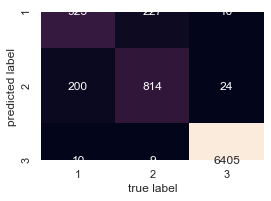

In [7]:
# Ploting confusion matrix with 'seaborn' module
# Use below line only with Jupyter Notebook
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
mat = confusion_matrix(test_labels, predicted)
plt.figure(figsize=(4, 4))
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(test_labels),
            yticklabels=np.unique(test_labels))
plt.xlabel('true label')
plt.ylabel('predicted label')
# Save confusion matrix to outputs in Workbench
# plt.savefig(os.path.join('.', 'outputs', 'confusion_matrix.png'))
plt.show()

## Printing classification report

In [8]:
%matplotlib inline
from sklearn.metrics import classification_report
print(classification_report(test_labels, predicted,
                            target_names=np.unique(test_labels)))

              precision    recall  f1-score   support

           1       0.80      0.81      0.81      1133
           2       0.78      0.78      0.78      1050
           3       1.00      0.99      1.00      6439

    accuracy                           0.94      8622
   macro avg       0.86      0.86      0.86      8622
weighted avg       0.94      0.94      0.94      8622

